# Multivariate Visualizations

## Non-Positional Encodings for Third Variables

There are four major cases to consider when we want to plot three variables together:

- three numeric variables
- two numeric variables and one categorical variable
- one numeric variable and two categorical variables
- three categorical variables
If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later that can also be applied to the other two cases, i.e. where we have at least two categorical variables.)

Three main non-positional encodings stand out: **shape**, **size**, and **color**. 

For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next  in the lesson.

### Encoding via shape

Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable. 

Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


In [5]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 
                 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [6]:
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


In [8]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,Large Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,37896,BMW,430i Gran Coupe,2017,Compact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,...,92,23.4350,30.0698,34.1627,49.6345,27.2915,324,6,6,Automatic
2979,38014,BMW,340i,2017,Compact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.0,...,96,19.0649,23.9882,29.2962,41.8348,22.6198,395,5,5,Manual
1015,34160,Chrysler,200 Convertible,2014,Compact Cars,Front-Wheel Drive,Automatic 6-spd,Regular Gasoline,4,2.4,...,0,18.1909,22.8000,28.7015,40.9000,21.7801,407,5,5,Automatic
3786,39502,Nissan,Altima SR,2018,Midsize Cars,Front-Wheel Drive,Automatic (AV-S7),Regular Gasoline,4,2.5,...,102,26.0000,35.1000,37.0000,53.5000,30.0000,296,7,7,Automatic


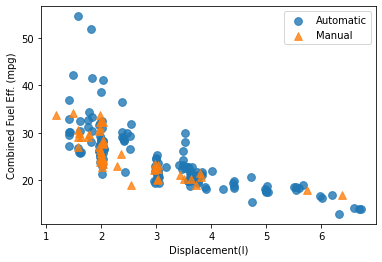

In [26]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04,
               fit_reg=False, marker=marker, scatter_kws={'s': 60})    

plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

The 'o' string specifies circular markers for members of category 'Automatic', while the '^' string specifies triangle markers for members of category 'Manual'. The `legend` function adds a `legend` to the plot, with one marker for every `regplot` call made. The function argument sets the labels for those points.

Note that the two categories have automatically been double-encoded with different colors, in addition to the explicitly specified markers. If we wanted the points to have the same color as well, we could do that through the `"c"` parameter in scatter or `"color"` in `regplot`. A small example of where this is useful will be seen in the next section.

### Encoding via size

Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the `"s"` parameter in `scatter`. (You need to refer to `"s"` through a dictionary assigned to the `"scatter_kws"` parameter when working with `regplot`.)

While the creation of the plot is easier with size, we need to put in extra leg work to create a `legend`. Since, as noted above, `legend` will only create one legend entry per plot function call, we need to create additional <u>dummy scatter objects</u> with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and three arguments are provided to the `legend` function: the list of plotting objects to depict in the legend, their labels, and the title of the legends.

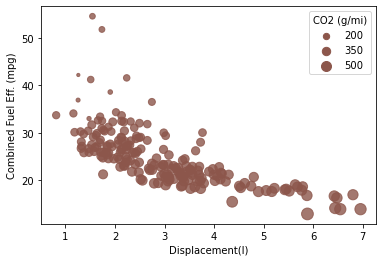

In [45]:
base_color = sb.color_palette()[5]
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.54, color=base_color,
           fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/5})    

plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# create a 
sizes= [200, 350, 500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/5, color=base_color))
plt.legend(legend_obj, sizes, title='CO2 (g/mi)');

In the case of the example, the data was also scaled in a way that the marker sizes made sense as given. You might need to apply a scaling factor (e.g., multiplying or dividing all values by 5 as shown) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

### A Warning on Combining Encodings

It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. Technically, this may be true, but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

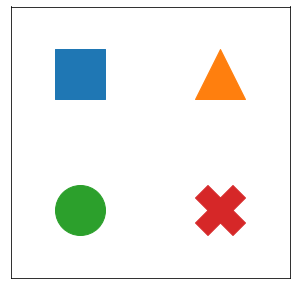

In [47]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker='s', s=common_size)
plt.scatter([1],[1], marker='^', s=common_size)
plt.scatter([0],[0], marker='o', s=common_size)
plt.scatter([1],[0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5, 1.5)
plt.xticks([])
plt.ylim(-0.5, 1.5)
plt.yticks([]);

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. 

## Color Palettes

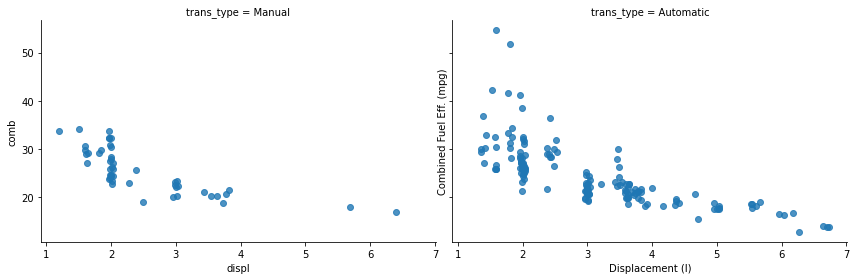

In [56]:
g = sb.FacetGrid(data=fuel_econ_subset, col='trans_type', height=4, aspect=1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

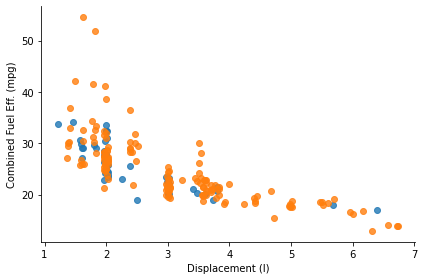

In [57]:
# plotting based on a nominal variable trans_type
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type', height=4, aspect=1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

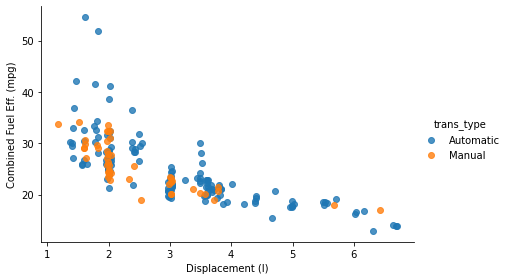

In [58]:
# the manual transmission points are plotted on top of automatic using hue_order
# this is not just plain order since FacetGrid can also 
# take orderings on other facet dimensions.
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type', height=4, aspect=1.5,
                hue_order=['Automatic', 'Manual'])
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

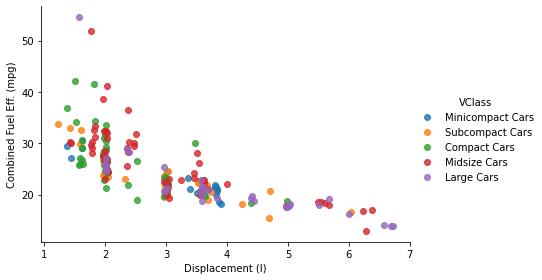

In [60]:
# plotting based on an ordered variable VClass, so the qualitative palette doesn't work 
# quite as well as nominal variables

g = sb.FacetGrid(data=fuel_econ_subset, hue='VClass', height=4, aspect=1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

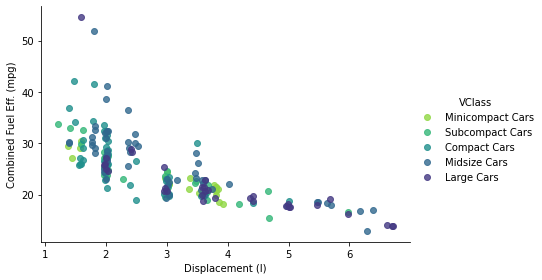

In [61]:
# specify a sequential palette instead
g = sb.FacetGrid(data=fuel_econ_subset, hue='VClass', height=4, 
                 aspect=1.5, palette='viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

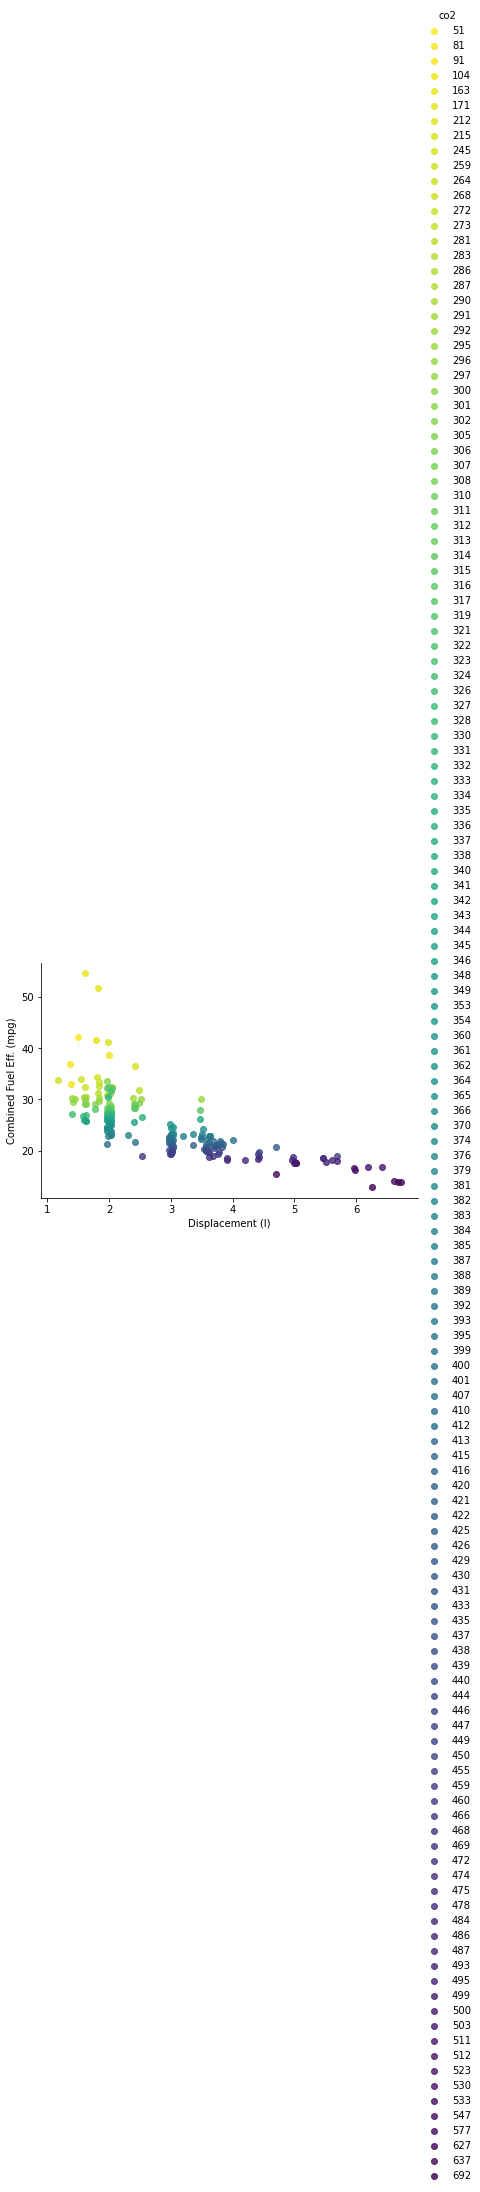

In [63]:
# what if we have numeric variable instead, co2 in this case
# we should not just set the variable in the hue parameter since
# FacetGrid only expects to facet across categorical variables

g = sb.FacetGrid(data=fuel_econ_subset, hue='co2', height=4, 
                 aspect=1.5, palette='viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

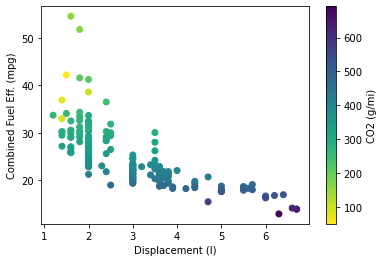

In [65]:
# adding another numeric variable as setting a c parameter (not hue parameter)
# different color palette as cmap parameter (not palette parameter)

plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2',
            cmap='viridis_r') # don't use jitter here
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');